In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Precision = 0.01

def weight(x):
    return x

class polynome :
    
    deg = 0
    coefs = np.array([])
    norme = 0
    
    def __init__(self, Liste):
        self.coefs= np.array(Liste)
        
    
    def _get_coefs(self) :
        return self.coefs
        
        
    def _set_coefs(self, Liste):
        self.coefs= np.array(Liste)

    def degre(self):
        self.deg = -1
        for i in range(len(self.coefs)):
            
            if(self.coefs[i] != 0):
                self.deg = i
        return self.deg
        
    def image(self, x):
        y = 0
        for i in range(len(self.coefs)):
            y += self.coefs[i]*(x**i)
        return y
        
    def afficher(self, a, b):
        X= np.arange(a,b+Precision,Precision)
        Y = np.array([])
        for j in range(len(X)):
            Y = np.append(Y,self.image(X[j]))
        plt.plot(X,Y)
            
    def normerLeg(self):
        n = self.image(1)
        self.coefs = self.coefs/n
        
class suitePolynomes:
    binf =-1
    bsup = 1
    suite = []
    
    
    def __init__(self, a, b):
        binf = a
        bsup = b
        
    def _add_Poly(self, P):
        self.suite.append(polynome(P))
        
    def _get_Poly(self, i):
        return self.suite[i]
        
    def afficher(self, n):
        for i in range(n):
            P =self._get_Poly(i)
            P.afficher(self.binf, self.bsup)
    
    def produit(self, i, j):
        Pi = self.suite[i]
        Pj = self.suite[j]
        dPi = Pi.degre()
        dPj = Pj.degre()
        Pi = Pi._get_coefs()
        Pj = Pj._get_coefs()
        P = np.zeros(dPi + dPj + 1)
        
        for l in range(len(P)):
            for k in range(l+1):
                
                if(k > dPi):
                    P[l] += 0
                elif(l-k > dPj):
                    P[l] += 0
                else:
                    P[l] += Pi[k]*Pj[l-k]
        return(P)
    
    def addition(self, i, j, a=1):
        Pi = self.suite[i]
        Pj = self.suite[j]
        dPi = Pi.degre()
        dPj = Pj.degre()
        Pi = Pi._get_coefs()
        Pj = Pj._get_coefs()
        P = np.zeros(max(dPi, dPj)+1)
        for k in range(max(dPi, dPj)+1):
            if(k > dPi):
                c1 = 0
            else:
                c1 = Pi[k]
          
            if(k > dPj):
                c2 = 0
            else:
                c2 = Pj[k]
            P[k] = c1 + a*c2
        return(P)


class PolynomesLegendre(suitePolynomes):
    
    def __init__(self,a,b):
        binf = a
        bsup = b 
        self._add_Poly([1])
        
    def scalaire(self, i, j):
        P = self.produit(i, j)
        S=0
        for i in range(0,len(P)):
            S+= P[i]*(self.bsup**(i+1))/(i+1)
            
            S-= P[i]*(self.binf**(i+1))/(i+1)
            
        return(S)
    
    def genererPolySuivant(self):
        
        Deg = self.suite[len(self.suite)-1].degre() + 1
       
        P = polynome(np.ones(Deg+1))
        
        self._add_Poly(P._get_coefs())
        for i in range(len(self.suite)-1):
            
            Ar = (-1)*self.scalaire(len(self.suite)-1, i) / self.scalaire(i,i)
            
            P = self.addition(len(self.suite)-1, i, Ar)
            self.suite[len(self.suite)-1] = polynome(P)
        
        return(P)
        
    def generernSuivants(self,n):
        for i in range(n):
            self.genererPolySuivant()
    
    def Normer(self):
        for i in range(len(self.suite)):
            self.suite[i].normerLeg()
    

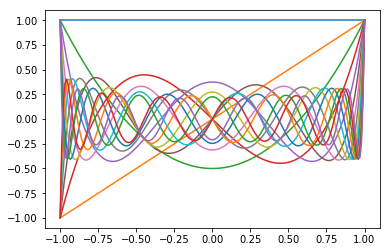

In [8]:
Suitasse = PolynomesLegendre(-1,1)

Suitasse.generernSuivants(15)
Suitasse.Normer()
Suitasse.afficher(15)



